<h1>Analysis of the Effect of Age and Cholesterol on Heart Disease</h1>

In [2]:
# Installing the package
install.packages("data.table")
install.packages("dplyr")
install.packages("vcd")
install.packages("ggplot2")
# for classification & regression training
install.packages("e1071") 
install.packages("caTools") 
install.packages("caret")

# Loading packages
library(tidyverse)
#library(tidyr)
library(corrplot)
library(data.table)
library(dplyr)
library(vcd)
library(ggplot2)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(modelr)
# for classification & regression training
library(e1071) 
library(caTools) 
library(caret) 

library(car)
library(tidymodels)
library(glmnet)
library(leaps)
library(faraway)
library(mltools)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the c

<h2>Introduction: - Duncan </h2>

<b> Background Information: </b>

The topic we are looking at is focused around heart disease. Understanding heart disease and its causes is vital as it remains a leading cause of death globally, impacting millions of lives annually. Identifying key risk factors, such as lifestyle choices, genetic predispositions, and physiological markers, enables early intervention and the development of targeted prevention strategies, ultimately reducing mortality and improving quality of life.

The dataset is related to heart disease prediction and contains data collected from multiple sources (Cleveland, Hungary, Switzerland, and Long Beach V). This dataset dates from 1988 and consists of heart disease data collected from multiple hospitals across different regions. It includes 14 variables commonly used in heart disease research, with 1025 observations. The primary goal of this dataset is to predict the presence of heart disease based on various medical attributes. The "target" variable indicates the presence (1) or absence (0) of heart disease.

<b> Brief Description of the Dataset: </b>

The Heart Disease Dataset originates from medical records and surveys with a specific aim at studying heart disease. The dataset includes various health-related measurements and attributes of patients used to analyze the presence or absence of heart disease based on several predictors.

<h2>Question(s) for Investigation: - Kobe </h2>

<b>1. How does age and cholesterol level increase the likelihood of having heart disease?</b>

<b>2. Which of the 13 predictor variables in the dataset are strongly correlated to heart disease, and does this indicate age and cholesterol influence the likelihood of heart disease?</b>

- Response variable: target (presence or absence of heart disease)
- Explanatory variable(s): age, chol (serum cholesterol levels)

The data provides us with a plethora of observations that make answering this question easy. The dataset contains the relevant variables that can help analyze the relationship between age and cholesterol levels with the diagnosis of heart disease. Here's how each variable contributes:
- `age` (age): Earlier studies suggest that the likelihood of developing heart disease increases with age making it a crucial variable for analysis. 
- `cholesterol` (chol): High cholesterol is a well-known risk factor for heart disease thus, analyzing its relationship with the diagnosis of heart disease will provide valuable information about its impact on heart disease.

Note: Cholesterol levels often increase with age, thus increasing the likelihood of developing heart disease, so it may be important to include this interaction term.

Utilizing these variables, we will be able to construct a statistical model to evaluate how they jointly influence the likelihood of having heart disease. Plots can be used to illustrate and visualize the relationship of these variables to heart disease. 

This question primarily focuses on inference but also has elements of prediction. This analysis aims to understand the relationship between the explanatory variables (age, cholesterol) and the response variable (likelihood of heart disease). Employing different statistical techniques from our studies, we will be able to infer how changes in age and cholesterol levels statistically affect heart health. To draw conclusions about the population from which the sample is drawn, we involve parameter estimations and hypothesis testing. While the main goal is to understand the relationships, the results of the analysis could also be used to predict the likelihood of heart disease in individuals based on their age and cholesterol levels. Thus, the model can provide a useful tool for predicting heart disease risk in future patients.

<b>Contextualization:</b> - Kobe

EXISTING RESEARCH

## **Methods and Results**

### **Exploratory Data Analysis (EDA)**

- Demonstrate that the dataset can be read into R.
- Clean and wrangle your data into a tidy format.
- Plot the relevant raw data, tailoring your plot to address your question.
- Make sure to explore the association of the explanatory variables with the response.
- Any summary tables that are relevant to your analysis.
Be sure not to print output that takes up a lot of screen space.

In [5]:
# Importing dataset
heart_disease_data <- read.csv("heart.csv")
head(heart_disease_data, 5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# Taking a look at heart_disease_data dataframe info
df_info <- str(heart_disease_data)

'data.frame':	1025 obs. of  14 variables:
 $ age     : int  52 53 70 61 62 58 58 55 46 54 ...
 $ sex     : int  1 1 1 1 0 0 1 1 1 1 ...
 $ cp      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ trestbps: int  125 140 145 148 138 100 114 160 120 122 ...
 $ chol    : int  212 203 174 203 294 248 318 289 249 286 ...
 $ fbs     : int  0 1 0 0 1 0 0 0 0 0 ...
 $ restecg : int  1 0 1 1 1 0 2 0 0 0 ...
 $ thalach : int  168 155 125 161 106 122 140 145 144 116 ...
 $ exang   : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  1 3.1 2.6 0 1.9 1 4.4 0.8 0.8 3.2 ...
 $ slope   : int  2 0 0 2 1 1 0 1 2 1 ...
 $ ca      : int  2 0 0 1 3 0 3 1 0 2 ...
 $ thal    : int  3 3 3 3 2 2 1 3 3 2 ...
 $ target  : int  0 0 0 0 0 1 0 0 0 0 ...


In [7]:
# Search for NAs in dataset
num_NAs <- sum(is.na(heart_disease_data))
num_NAs

[1] 0

In [8]:
# Summary of heart_disease_data, including quantitative information on each variable
summary(heart_disease_data)

      age             sex               cp            trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.0000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :1.0000   Median :130.0  
 Mean   :54.43   Mean   :0.6956   Mean   :0.9424   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.0000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.0000   Max.   :200.0  
      chol          fbs            restecg          thalach     
 Min.   :126   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:132.0  
 Median :240   Median :0.0000   Median :1.0000   Median :152.0  
 Mean   :246   Mean   :0.1493   Mean   :0.5298   Mean   :149.1  
 3rd Qu.:275   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak          slope             ca        
 Min.   :

In [9]:
# Converting dataframe to tibble
heart_disease_tibble <- as_tibble(heart_disease_data)
head(heart_disease_tibble, 5)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


| Description                     | Column Name | Type      | Mean  | High | Low |
|----------------------------------|-------------|-----------|-------|------|-----|
| Age of the patient               | age         | Continuous| 54.43 | 77   | 29  |
| Gender (1 = Male, 0 = Female)    | sex         | Binary    | 0.6956| N/A  | N/A |
| Chest pain type                  | cp          | Categorical| 0.9424| N/A  | N/A |
| Resting blood pressure (mm Hg)   | trestbps    | Continuous| 131.6 | 200  | 94  |
| Serum cholesterol (mg/dL)        | chol        | Continuous| 246   | 564  | 126 |
| Fasting blood sugar > 120 mg/dL  | fbs         | Binary    | 0.1493| N/A  | N/A |
| Resting ECG results              | restecg     | Categorical| 0.5298| N/A  | N/A |
| Maximum heart rate achieved      | thalach     | Continuous| 149.1 | 202  | 71  |
| Exercise induced angina (1 = Yes, 0 = No)| exang| Binary    | 0.3366| N/A  | N/A |
| ST depression induced by exercise| oldpeak     | Continuous| 1.072 | 6.2  | 0   |
| Slope of peak exercise ST segment| slope       | Categorical| 1.385 | N/A  | N/A |
| Number of major vessels          | ca          | Categorical| 0.7541| 4    | 0   |
| Thalassemia type                 | thal        | Categorical| 2.324 | N/A  | N/A |
| Presence of heart disease (1 = Yes, 0 = No)| target| Binary | 0.5132| N/A  | N/A |


Variable Type Overview:
- Continuous variables: Age, resting blood pressure, serum cholesterol, maximum heart rate, ST depression
- Categorical variables: Sex, chest pain type, resting ECG results, slope, number of vessels, thalassemia
- Binary variables: Fasting blood sugar, exercise-induced angina, presence of heart disease (target)

Now that the data is clean and wrangled into a tidy format, a correlation matrix visualization will be produced to find the strength of correlation between all continuous exploratory variables in heart_disease_data. This heatmap will be helpful to hypothesize which variables may be problematic and inapplicable to creating a model for inference, and whether or not age and cholesterol have high correlations with any variables in the dataset.

**PLOTS (Duncans kinda suck)**

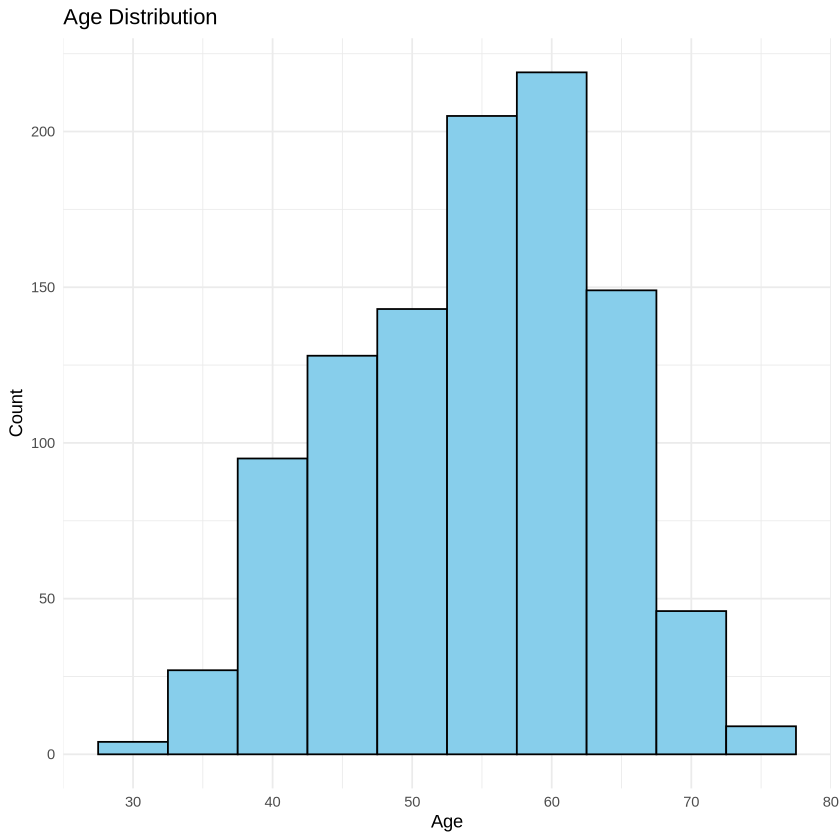

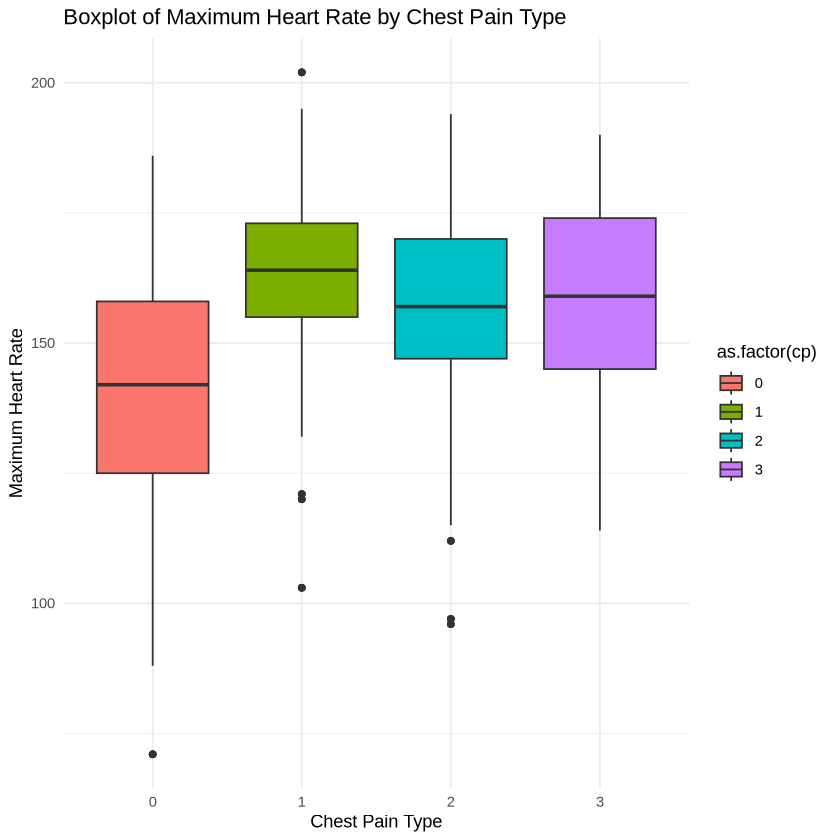

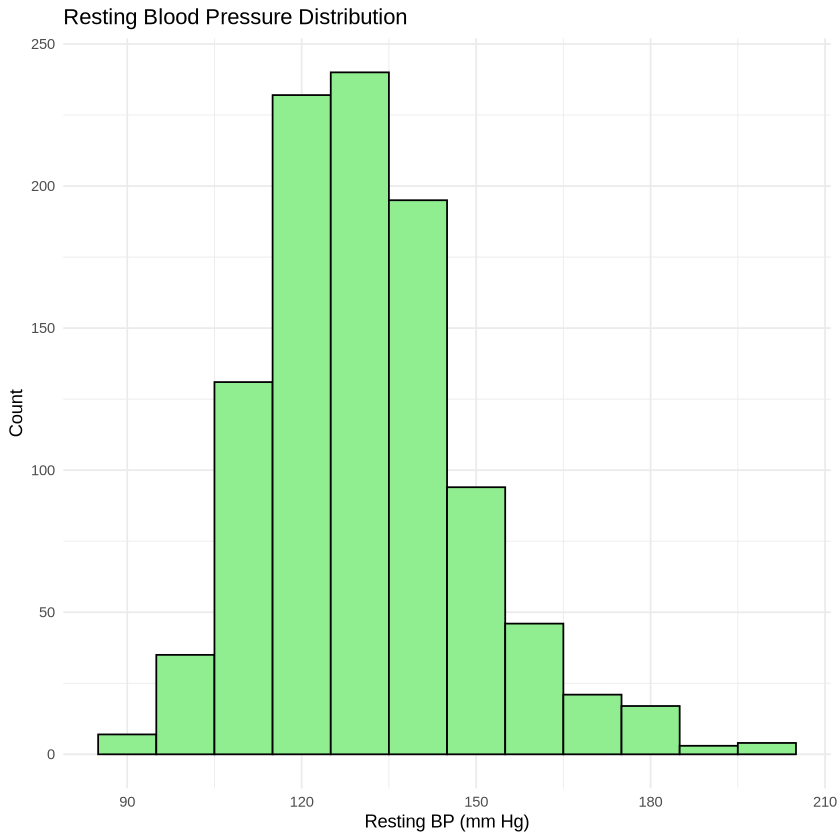

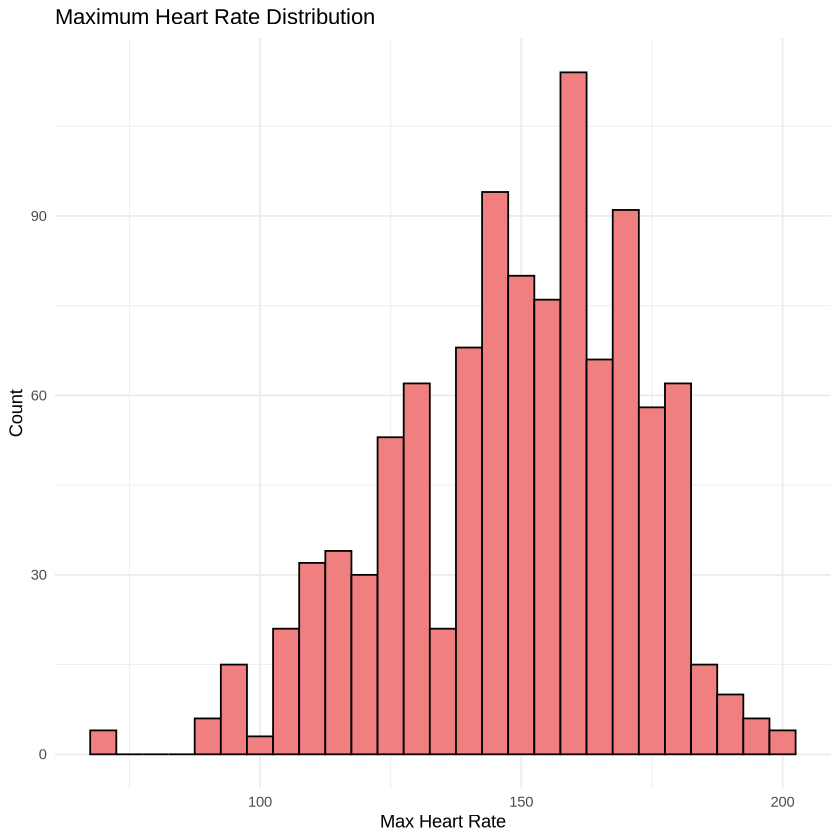

In [10]:
# Histogram for age
ggplot(heart_disease_data, aes(x = age)) +
  geom_histogram(binwidth = 5, fill = 'skyblue', color = 'black') +
  labs(title = "Age Distribution", x = "Age", y = "Count") +
  theme_minimal()

# Boxplot for chest pain
ggplot(heart_disease_data, aes(x = as.factor(cp), y = thalach, fill = as.factor(cp))) +
  geom_boxplot() +
  labs(title = "Boxplot of Maximum Heart Rate by Chest Pain Type", 
       x = "Chest Pain Type", 
       y = "Maximum Heart Rate") +
  theme_minimal()

# Histogram for resting blood pressure
ggplot(heart_disease_data, aes(x = trestbps)) +
  geom_histogram(binwidth = 10, fill = 'lightgreen', color = 'black') +
  labs(title = "Resting Blood Pressure Distribution", x = "Resting BP (mm Hg)", y = "Count") +
  theme_minimal()

# Histogram for maximum heart rate achieved
ggplot(heart_disease_data, aes(x = thalach)) +
  geom_histogram(binwidth = 5, fill = 'lightcoral', color = 'black') +
  labs(title = "Maximum Heart Rate Distribution", x = "Max Heart Rate", y = "Count") +
  theme_minimal()

**Age Distribution (Histogram):**
- Helps visualize the distribution of ages in the dataset.
- Relevant for exploring the correlation between age and heart disease, as heart disease risk increases with age.

**Boxplot of Maximum Heart Rate by Chest Pain Type:**
- Illustrates the variation in maximum heart rate across different chest pain types.
- Useful for identifying how different chest pain types are associated with heart function and heart disease risk.

**Resting Blood Pressure Distribution (Histogram):**
- Shows the spread of resting blood pressure levels across the dataset.
- Important for understanding how high or low blood pressure relates to heart disease likelihood.

**Maximum Heart Rate Distribution (Histogram):**
- Provides an overview of the maximum heart rate values achieved by patients.
- Can reveal whether lower heart rates under stress testing are associated with heart disease presence, a critical factor in cardiovascular health.


These plots are relevant because they help in understanding the relationships between potential predictors (age, chest pain type, resting blood pressure, heart rate) and heart disease. Together, they allow for a thorough exploration of the data, guiding both prediction and inference tasks.

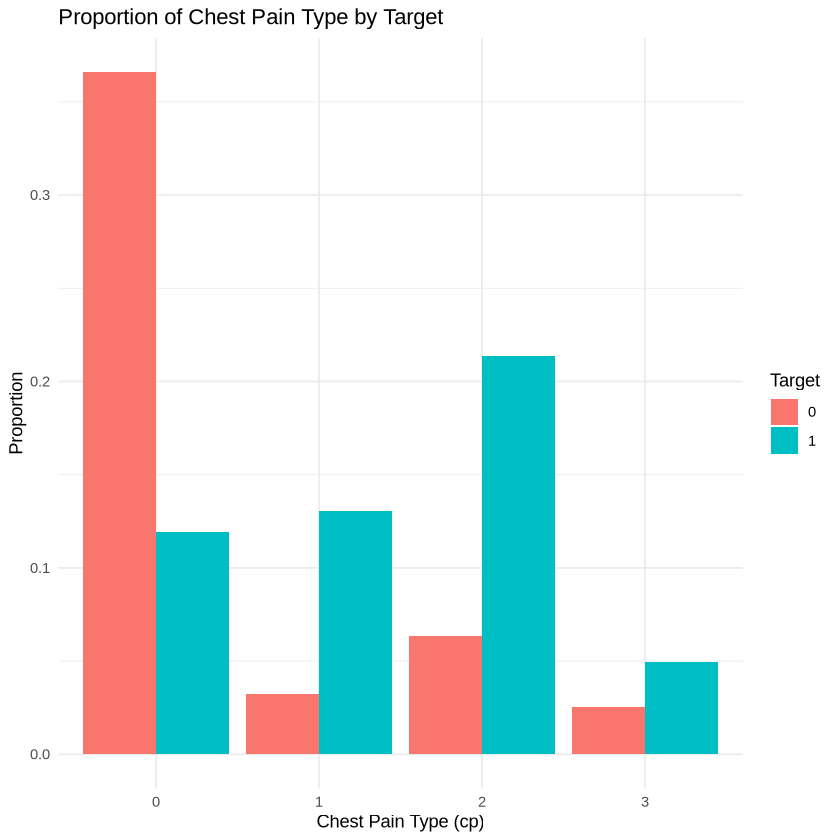

In [11]:
# Bar Plot comparing chest pain type to target
# Calculate proportions for chest pain type (cp) by target
test <- heart_disease_data %>%
  group_by(cp) %>%
  mutate(total_in_cp = n()) %>%
  group_by(cp, target) %>%
  summarise(count = n(), .groups = "drop") %>%
  mutate(proportion = count / sum(count))

# Create the bar plot using proportions
ggplot(test, aes(x = as.factor(cp), y = proportion, fill = as.factor(target))) +
  geom_col(position = "dodge") +
  labs(
    title = "Proportion of Chest Pain Type by Target",
    x = "Chest Pain Type (cp)",
    y = "Proportion",
    fill = "Target"
  ) +
  theme_minimal()

Within each chest pain type, the proportion of each target category is calculated by dividing the count of each target category by the total count for that chest pain type.

This plot is also useful as it indicates the relationship between the target and the kinds of chest pain experienced. Chest pain of types 2 and 3 appear more associated with individuals that do suffer from heart disease, potentially indicating a higher likelihood of the condition, while chest pain type 0 is much more common in those without heart disease.

### Finding Correlation Coefficients via Heatmap 

Warning message in melt.default(correlation_matrix):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(correlation_matrix). In the next version, this warning will become an error.”


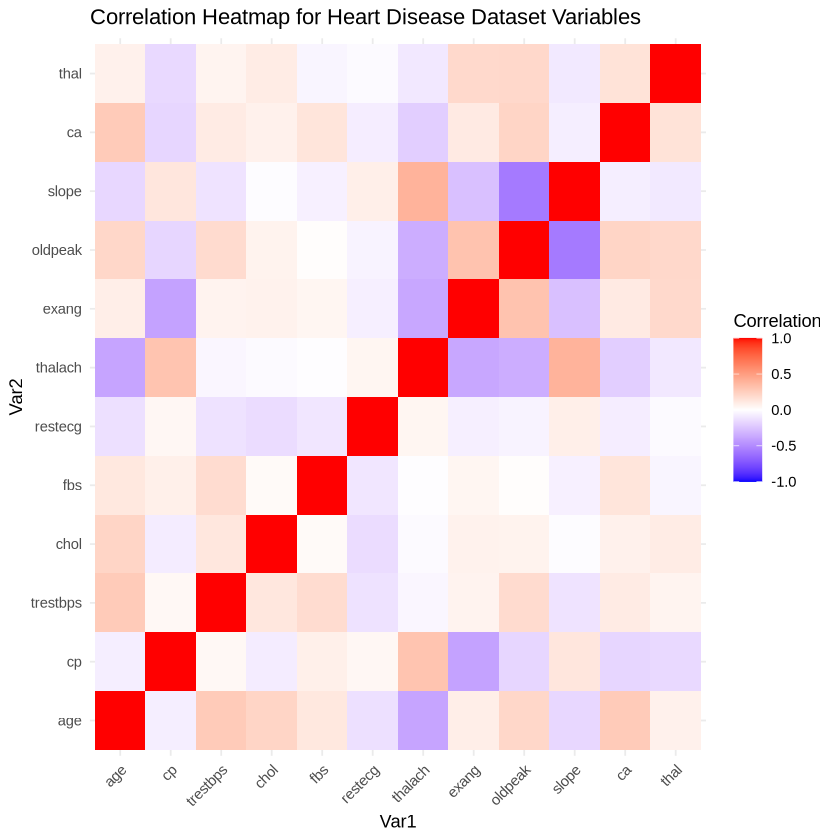

In [12]:
# Selecting only for continuous variables, excluding categorical variables
selected_vars <- c("age", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal")
selected_df <- heart_disease_data[, selected_vars]

# Creating the correlation matrix
correlation_matrix <- cor(selected_df, use = "pairwise.complete.obs")

# Melting the matrix
melted_corr <- melt(correlation_matrix) 

# Create the heatmap via ggplot()
 heatmap <- ggplot(data = melted_corr, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), 
                       name="Correlation") +
  theme_minimal() +
  labs(title = "Correlation Heatmap for Heart Disease Dataset Variables") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

heatmap

Of the continuous variables, the most strongly correlated are the following:
- _oldpeak_ and _slope_ (strongest observed correlation)
- _thalach_ and _age_
- _exang_ and _cp_
- _exang_ and _thalach_
- _oldpeak_ and _thalach_

_age_ has a strong negative correlation with _thalach_, indicating these variables strongly influence each other's estimated coefficient in the regression model. _Age_ and _chol_ have a low positive correlation with _r_ = 0 - 0.4, indicating these variables weakly influence each other's estimated coefficients in a binary logistic regression model. Very few overpowering, influential exploratory continuous variables exist in this dataset.

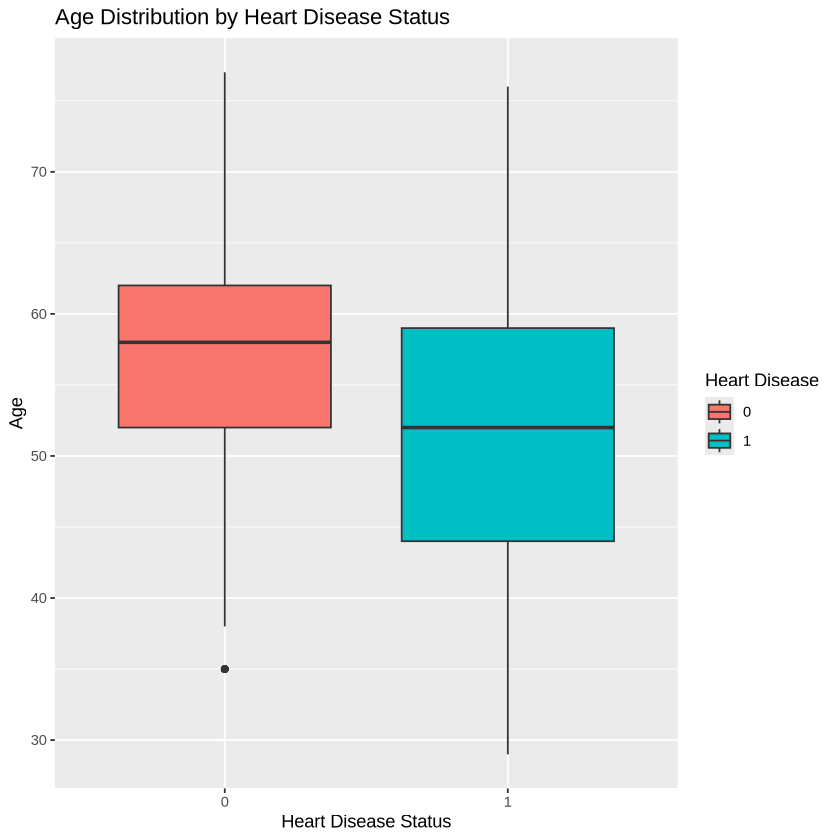

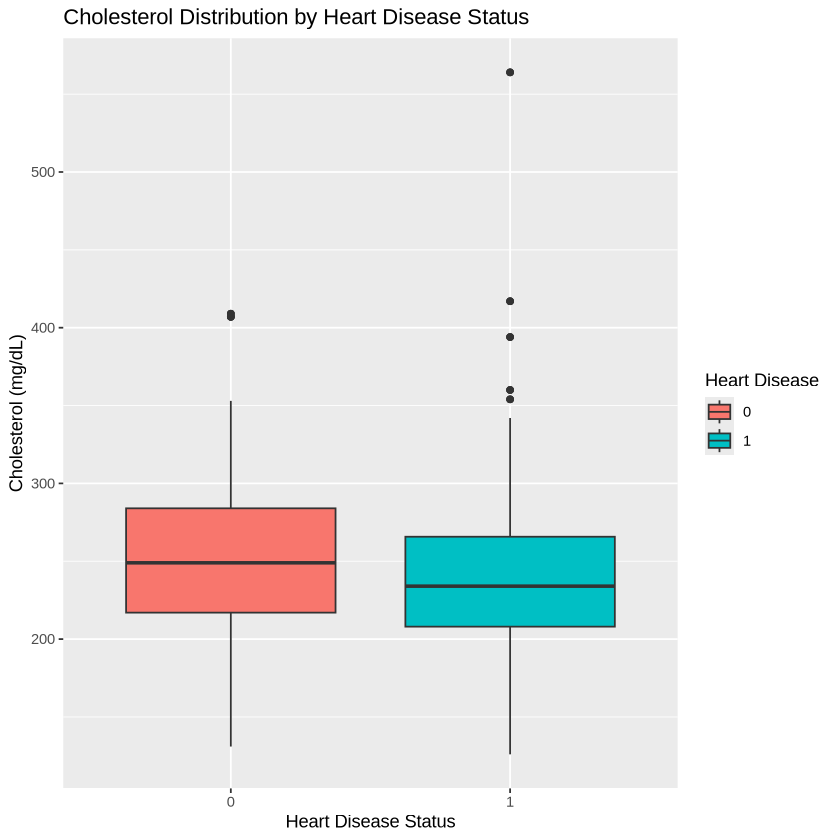

In [13]:
# Box plot of age by heart disease status
heart_boxplot_age <- ggplot(heart_disease_data, aes(x = factor(target), y = age, fill = factor(target))) +
  geom_boxplot() +
  labs(title = "Age Distribution by Heart Disease Status", 
       x = "Heart Disease Status", 
       y = "Age", 
       fill = "Heart Disease")

# Box plot of cholesterol by heart disease status
heart_boxplot_chol <- ggplot(heart_disease_data, aes(x = factor(target), y = chol, fill = factor(target))) +
  geom_boxplot() +
  labs(title = "Cholesterol Distribution by Heart Disease Status", 
       x = "Heart Disease Status", 
       y = "Cholesterol (mg/dL)", 
       fill = "Heart Disease")

heart_boxplot_age
heart_boxplot_chol

Boxplots allow for the comparison of the central tendency (median) and spread (quantiles) of both variables for individuals with and without heart disease. The benefit of visualizing the variables separately with two separate boxplots for each heart disease status (target = 0 and target = 1) is that it allows for a clear comparison of the distribution of variables like age or cholesterol between the two groups. This visualization highlights key patterns, such as differences in medians, spread, and potential outliers, which could indicate a relationship between the variable and heart disease. It helps detect skewness, extreme values, and assess whether a particular variable contributes to the likelihood of heart disease. Overall, it provides valuable insights for understanding how heart disease status is related to specific health factors.

In [ ]:
# Create a 3D scatter plot to visualize the interaction between age, cholesterol, and heart disease status
heart_3D_plot <- plot_ly(heart_selected, 
        x = ~age, 
        y = ~chol, 
        z = ~target, 
        color = ~factor(target), 
        colors = c("blue", "red"), 
        type = "scatter3d", 
        mode = "markers") %>%
        layout(title = "Interaction of Age, Cholesterol, and Heart Disease Status",
         scene = list(
           xaxis = list(title = "Age"),
           yaxis = list(title = "Cholesterol Level (mg/dL)"),
           zaxis = list(title = "Heart Disease Status")
         ))

heart_3D_plot

This 3D plot will show how age and cholesterol are related to the target (heart disease status).
The color of the points indicates the presence (red) or absence (blue) of heart disease.
A 3D plot allows reader to interact with the plot to explore the relationships from different angles. This can lead to a more complex understanding of the data analysis.   

### **Methods: Plan**

<b>Method to address the question of interest: </b> 

LASSO Regression to fit a Binary Logistic Regression for Inferential Modelling

<b>Why is this method appropriate?</b>

Binary Logistic Regression is an effective method for binary classification, particularly when determining the relationship between continuous numeric input variables and a binary dependent variable. In other words, this method of choice is appropriate for this analysis because the target variable (target) is binary, where a value of 1 indicates the presence of heart disease and 0 indicates its absence. This type of problem is a typical binary classification task, making logistic regression an ideal method for analysis. Logistic regression models the probability of an event occuring, which is well-suited for estimating the probability of each value in dichotomous dependent variables. Moreover, it allows for the inclusion of multiple explanatory variables which enables a more compelx and comprehensive analysis of factors contributing to heart disease. Additionally, logistic regression is widely used in medical research to model outcomes with binary responses, in our case: the presence or absence of heart disease.

The model's performance is enhanced by using LASSO (Least Absolute Shrinkage and Selection Operator), which helps reduce overfitting by applying shrinkage to the coefficients. LASSO performs feature selection, identifying input variables with minimal multicollinearity, and ensuring that only the most significant variables are included in the mode. 


<b> Required Assumptions to Apply Binary Logistic Regression: </b>
1. The target variable is binary with two possible outcomes (in this dataset: 0 = no heart disease and 1=has heart disease)
  
2. The observations in the dataset are assumed to be independent of each other. No correlated data points exist, each observation was independently collected, and had no influence on each other. If there is any autocorrelation or clustering (e.g., if patients in the same family are included), this assumption could be violated.

3. The independent variables should not be highly correlated with each other (i.e. no multicollinearity), as this could make the model unstable.Moderate or very low multicollinearity is ideal where explanatory variables should be weakly or not at all correlated to prevent issues with lower precision, such as estimated coefficients with large confidence intervals

4. Logistic regression assumes a sufficient sample size to estimate the model parameters accurately.

<b>Potential Limitations or Weaknesses of Binary Logistic Regression?</b>

Binary logistic Regression assumes a linear relationship between exploratory variables and the log odds of the response variable, which is very uncommon in real-world scenarios. This includes health, where various factors such as a patient's specific medical history and correlated variables also affect the observation. A pre-requisite of using this method is moderate-low multicollinearity between independent variables, which is unlikely since many physiological variables are often correlated (ex. age and blood pressure). This interpretation may simplify our view of the dataset, although many real-world correlated input variables can influence the calculated magnitude of an individual independent variable's effect on the likelihood of heart disease. 

1. If the relationship between the predictors and the log-odds of heart disease is non-linear, logistic regression may not provide the most accurate results. In such cases, transformations or more complex models may be necessary.

2. Multicollinearity between explanatory variables distorts the model and inflates standard errors, which can lead to misleading conclusions. If multicollinearity is present, variable selection or dimensionality reduction techniques such as PCA may be required. It is important to check for multicollinearity and possibly remove highly correlated predictors or combine them.

3. Logistic regression requires a sufficiently large sample size, especially when many predictors are included. Smaller sample sizes can lead to overfitting and unreliable estimates which is not good for analysis.

4. Logistic regression is sensitive to outliers which affects the model performance.

5. The assumption that the relationship between the predictors and the log-odds of the outcome is linear may not always hold. when this assumption is violated, the model may not perform properly. In such cases, alternative models may be more appropriate.

<b>Potential limitations or weaknesses of LASSO Regression?</b>
1. Biased estimators: the sampling distributions of LASSO estimators are not centered at the true value of the parameter.
 
2. "Double Dipping": The same data cannot be used to select variables of the model and also conduct inference, however this post-inference issue occurs when fitting an LS regression after LASSO

<b> What can be done to handle this: </b>
1. To handle highly-correlated variables: Lasso ridge will be used for selecting variables by finding the lowest MSE values, and dropping the variables that may be problematically highly correlated (high MSE values)

2. To handle biased estimators: post-lasso technique can be applied by fitting regular least squares onto all exploratory variables LASSO selects, although this does not apply to a logistic model with a binary non-continuous response variable, so other models may be explored to account for this weakness

3.  To handle "double dipping": we split the data into two parts, where one is for model selection, the other for inference

### Implementation of a Proposed Model (Computational code and output)

#### Applying Lasso Regression

In [14]:
#Splitting the dataset to handle the "double-dipping" issue, one portion is for model selection, the other is for inference
data_split <- initial_split(heart_disease_data, prop = 0.6, strata = target)
data_selection <- training(data_split)
data_inference <- testing(data_split)

In [15]:
#Running Lasso on data_selection tibble to find value lambda that provides lowest Cross-validation MSE
set.seed(20211118)

lasso_model <-
    cv.glmnet(data_selection %>% select(-target) %>% as.matrix(), 
              data_selection$target, 
              alpha=1)

In [16]:
# Extracting coefficients of the best lasso model (smallest MSE)
set.seed(20211118)


beta_lasso <-
    coef(lasso_model, s = lasso_model$lambda.min)

**Observation**

During selection of best variables for the lasso model, fbs (fasting blood sugar) was cancelled: this indicates it has no statistically significant correlation to target (p-value > 0.05). Otherwise, since LASSO has kept 8 variables, there is likely minimal multicollinearity between the exploratory input variables of the dataset.

In [17]:
# Finding the covariates lasso selected
lasso_picked_covariates <-
    as_tibble(
        as.matrix(beta_lasso),
        rownames='covariate') %>%
        filter(covariate != '(Intercept)' & abs(s1) !=0) %>% 
        pull(covariate)

In [18]:
# Taking a look at vif (variance inflation factor) of variables selected by lasso
lasso_variables_vif <- vif(lm(target ~ . , data = data_selection %>% 
        select(contains(lasso_picked_covariates), target)))

print(lasso_variables_vif)

     age      sex       cp trestbps     chol      fbs  restecg  thalach 
1.411425 1.173932 1.351845 1.169048 1.186238 1.102721 1.069711 1.646316 
   exang  oldpeak    slope       ca     thal 
1.471221 1.690143 1.683187 1.179317 1.131318 


**Observation**

All selected exploratory variables have VIF values slightly above 1 (_oldpeak+ being the greatest at MSE=1.66), and large VIF values >5 or > 10 are considered indicators of higher multicollinearity. This suggests low multicollinearity in the dataset. Correlation between exploratory variables is only a minor issue in this dataset, which is consistent with _Correlation Heatmap for Heart Disease Dataset Variables_, where very few strongly correlated variable pairs were observed.

In [19]:
# producing the inference model visualization based on the covariates picked by lasso
inference_model <- 
    glm( target ~ .,
        data = data_inference %>% 
                   select(contains(lasso_picked_covariates), target),
       family=binomial)


summary(inference_model) 


Call:
glm(formula = target ~ ., family = binomial, data = data_inference %>% 
    select(contains(lasso_picked_covariates), target))

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.671439   2.520437   1.853 0.063822 .  
age         -0.002970   0.020846  -0.142 0.886697    
sex         -1.974408   0.436197  -4.526 6.00e-06 ***
cp           1.014700   0.173408   5.852 4.87e-09 ***
trestbps    -0.018299   0.009573  -1.911 0.055953 .  
chol        -0.007069   0.004033  -1.753 0.079630 .  
fbs         -0.260963   0.535006  -0.488 0.625708    
restecg      0.649509   0.317637   2.045 0.040873 *  
thalach      0.020635   0.010609   1.945 0.051769 .  
exang       -0.852138   0.382546  -2.228 0.025911 *  
oldpeak     -0.691318   0.206439  -3.349 0.000812 ***
slope        0.712773   0.306588   2.325 0.020079 *  
ca          -1.051797   0.195747  -5.373 7.73e-08 ***
thal        -1.162080   0.273941  -4.242 2.21e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.

### **Interpretation of Results**

The inference model produced indicates the following unexpected result: _age_'s p-value = 0.609 and _chol_'s p-value = 0.39, both of which are > 0.05 (significance level) by a large margin. Concerning the question of interest, based on the final _inference model_ produced by lasso regression on the binary logistic model, these variables **do not** have a statistically significant effect on the likelihood of heart disease. The variables _sex_, _cp_, _trestbps_, _exang_, _oldpeak_, _slope_, _ca_, and _thal_ have p-values < 0.05, where _sex_,_cp_,_exang_, and _ca_ have especially strongly statistically significant correlations to the likelihood of heart disease, suggesting these are the best predictor variables for creating a logistic model to determine the probability an individual has heart disease.
- Potential issue: Residual deviance of 268 on 398 degrees of freedom indicates that the model does not explain some variance in the data, so this model possibly is not the best fit for inference, although AIC=294.35 may be used for comparison to explore other methods (with potentially lower AICs) to produce a model that more strongly fits the data

## **Discussion**

## **References**

https://argoshare.is.ed.ac.uk/healthyr_book/model-assumptions.html

https://www.ibm.com/topics/lasso-regression

https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/